# Analysis of the PLAICRAFT Dataset
Author: Liam Murray | 87357539 \
Project Start: May 20th, 2025

### Introduction 👋
<!-- Background: provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

Question(s): clearly state the question you tried to answer with your project. Your question should involve one response variable of interest and one or more explanatory variables, and should be stated as a question. One common question format is: “Can [explanatory variable(s)] predict [response variable] in [dataset]?”, but you are free to format your question as you choose so long as it is clear.

Data Description: identify and fully describe the dataset that was used to answer the question. Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics, number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format. Note that the selected dataset(s) will probably contain more variables than you need.  -->
#### What is PLAICraft?
Minecraft was first introduced in 2011 as a "sandbox game" where players could explore, build, and survive within a three-dimensional world (Wikipedia). As of 2025, Minecraft is the best-selling video game of all time with three hundred million units sold (Guinness World Records). At the University of British Columbia (UBC), the [Pacific Laboratory for Artificial Intelligence (PLAI)](https://plai.cs.ubc.ca/) collected data on how people play video games by recording players actions while on a multiplayer Minecraft server named ["PLAICraft"](https://plaicraft.ai/).

#### What are we asking?
Due to technical limitations such as server hardware and software licenses, PLAI has an interest proactively forecasting popular times in order to accommodate all players. This interest was formed into the following research question:
> Can a players age and experience level predict the time and length of gaming sessions on the PLAI Minecraft server?

By answering this question, we may be able to predict which time periods will have the most parallel players on the Minecraft server, allowing PLAI to adapt to these patterns.

#### What data were we working with?
The PLAICraft data released to us included two files, both datasets were combined using users hashed emails, so both have been summarized below. 

<!-- `players.csv` - this file includes anonymized information about players age, gender, Minecraft experience level, hours played on PLAICraft, and their newsletter subscription status. The file also includes players names and hashed email addresses, though this data was likely only recorded for record-keeping. -->

`players.csv` - This dataset includes anonymized information about individual players who registered on the PLAICraft server.
- There was a total of 196 observations recorded in this dataset, reflective of the players registered on the server.
    - Players were aged between 8 and 50 years old.
    - 63.27% of players identified as male, 18.88% identified as female, and 17.85% identified as Non-binary, Agender, Two-Spirited or other.
- There are 7 variables present in this dataset, which included Outcome, Categorical, and Label variables.

<style type="text/css">
.tg  {border:none;border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-btxf{background-color:#f9f9f9;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<center>
<table class="tg"><thead>
  <tr>
    <th class="tg-7btt">Variable Type</th>
    <th class="tg-7btt">Variable Name</th>
    <th class="tg-fymr">Explanation</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-btxf" rowspan="2">Outcome variables</td>
    <td class="tg-btxf"><code>played_hours</code></td>
    <td class="tg-btxf" rowspan="2">These variables could be reflective of the categorical behaviours of players, and could be modeled for using categorical variables.</td>
  </tr>
  <tr>
    <td class="tg-0pky"><code>subscribe</code></td>
  </tr>
  <tr>
    <td class="tg-btxf" rowspan="3">Categorical variables</td>
    <td class="tg-btxf"><code>age</code></td>
    <td class="tg-btxf" rowspan="3">These variables can be used to group participants by varying demographics, which could be effectively used to model players on the server.</td>
  </tr>
  <tr>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal"><code>gender</code></span></td>
  </tr>
  <tr>
    <td class="tg-btxf"><span style="font-weight:400;font-style:normal"><code>experience</code></span></td>
  </tr>
  <tr>
    <td class="tg-0pky" rowspan="2">Label variables</td>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal"><code>hashedEmail</code></span></td>
    <td class="tg-0pky" rowspan="2">These variables are used to identify and track individual participants, these would likely not be useful for modeling and were only collected for participant registration.</td>
  </tr>
  <tr>
    <td class="tg-btxf"><span style="font-weight:400;font-style:normal"><code>name</code></span></td>
  </tr>
</tbody></table>
</center>

`sessions.csv` - This dataset provides information on each recorded game session on the PLAICraft server. This dataset differentiated players by associating each session with a hashed email address.
- There was a total of 1535 observations recorded in this dataset, which each represent one gaming session on the PLAICraft server.
    - If filtered for sessions greater than 0 minutes, the mean session length is 50.86 minutes, with the shortest and longest being 3 and 259 mins respectively.
- There are 5 variables present in this dataset, though there is repetition due to the time information being saved in both a standard time-date format and [Epoch Unix Timestamps](https://en.wikipedia.org/wiki/Unix_time).

<style type="text/css">
.tg  {border:none;border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-btxf{background-color:#f9f9f9;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<center>
<table class="tg"><thead>
  <tr>
    <th class="tg-7btt">Variable Name</th>
    <th class="tg-fymr">Explanation</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-btxf"><code>hashedEmail</code></td>
    <td class="tg-btxf">This securely identifies the player who is being recorded.</td>
  </tr>
  <tr>
    <td class="tg-0pky"><code>start_time</code></td>
    <td class="tg-0pky" rowspan="2">These variables record the start and end time of sessions, and are converted into a human-readable Date and Time format.</td>
  </tr>
  <tr>
    <td class="tg-btxf"><code>end_time</code></td>
  </tr>
  <tr>
    <td class="tg-0pky"><code>original_start_time</code></td>
    <td class="tg-0pky" rowspan="2">These variables record the start and end time of sessions, which were saved as Epoch Unix Timestamps.</td>
  </tr>
  <tr>
    <td class="tg-btxf"><code>original_end_time</code></td>
  </tr>
</tbody>
</table>
</center>
<!-- `sessions.csv` - this file provides information on each recorded game session on the PLAICraft server, including the player (via hashed email), and the start and end times (both the unix time stamp and the adjusted calendar date and time). -->

### Methods and Results 🛠️
<!-- describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
loads data 
wrangles and cleans the data to the format necessary for the planned analysis
performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question
performs the data analysis. For your analysis, you should think about and provide a brief explanation of the following questions:
Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
How did you compare and select the model?
Note: you should also think about the following:
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
creates a visualization of the analysis 
note: all figures should have a figure number and a legend -->

#### Loading Libraries and Data 📂

The libraries used in this analysis are as follows:
<style type="text/css">
.tg  {border:none;border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-btxf{background-color:#f9f9f9;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7btt">Library</th>
    <th class="tg-fymr">Purpose</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-btxf"><code>tidyverse</code></td>
    <td class="tg-btxf">Includes functions for data wrangling, and includes <code>hms</code> to make analysis of time data easier.</td>
  </tr>
  <tr>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal"><code>janitor</code></span></td>
    <td class="tg-0pky">Includes helper classes (like <code>clean_names()</code>) to create tidier column titles.</td>
  </tr>
</tbody>
</table>

The datasets were loaded directly from `.csv` files, as they were distributed through Canvas links. Each dataset was then cleaned to remove redundancy and increase simplicity.

For `sessions.csv`:
1. Clean column names with `janitor`.
2. Keep only used variables (`hashed_email` and non-unix times).
3. Mutate times as `dmy_hm` date-time measurements.
4. Calculate session_length for each session.

For `players.csv`:
1. Clean column names with `janitor`.
2. Mutate `gender, experience, subscribe` variables as factors to simplify grouping.

To be able to access information across datasets, `session_data` and `player_data` were merged by the shared `hashed_email` variable. This action results in a tidy dataset as:

✅ - Each row is a single observation (each observation is a single gaming session that includes the players information) \
✅ - Each column is a single variable (the only overlap in variables is `hashed_email` whiched we merged by). \
✅ - Each value is a single cell (technically there is more than one piece of information in the time variables, though they are encapsulated in one variable type.)

In [10]:
# Import Libraries
library(tidyverse)
require(janitor)

session_data <- read_csv("data/sessions.csv") |>
    clean_names() |>
    select(hashed_email:end_time) |>
    mutate(start_time = dmy_hm(start_time)) |>
    mutate(end_time = dmy_hm(end_time)) |>
    mutate(session_length = end_time - start_time)

player_data <- read_csv("data/players.csv") |> 
    clean_names() |>
    mutate(gender = as_factor(gender)) |>
    mutate(experience = as_factor(experience)) |>
    mutate(subscribe = as_factor(subscribe))

merged_data <- merge(x = session_data, y = player_data, by = "hashed_email")

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Exploratory Data Analysis 🚀
> Can a players age and experience level predict the time and length of gaming sessions on the PLAI Minecraft server?

Looking at our research question above, there are some relationships that we could explore:
- Is there a relationship between age and the total hours played?
    - Older students and working professionals would likely have less free time than young teenagers and children.
- Is there a relationship between age and when gaming sessions start?
    - Students and working professionals would have more restricted hours for gaming than younger teenagers and children, but could possibly have later gaming sessions.
- Is there a relationship between experience and hours spent on the gaming server?
    - It could be more likely that experienced players would commit more time to the server, as they are already invested in the game.


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


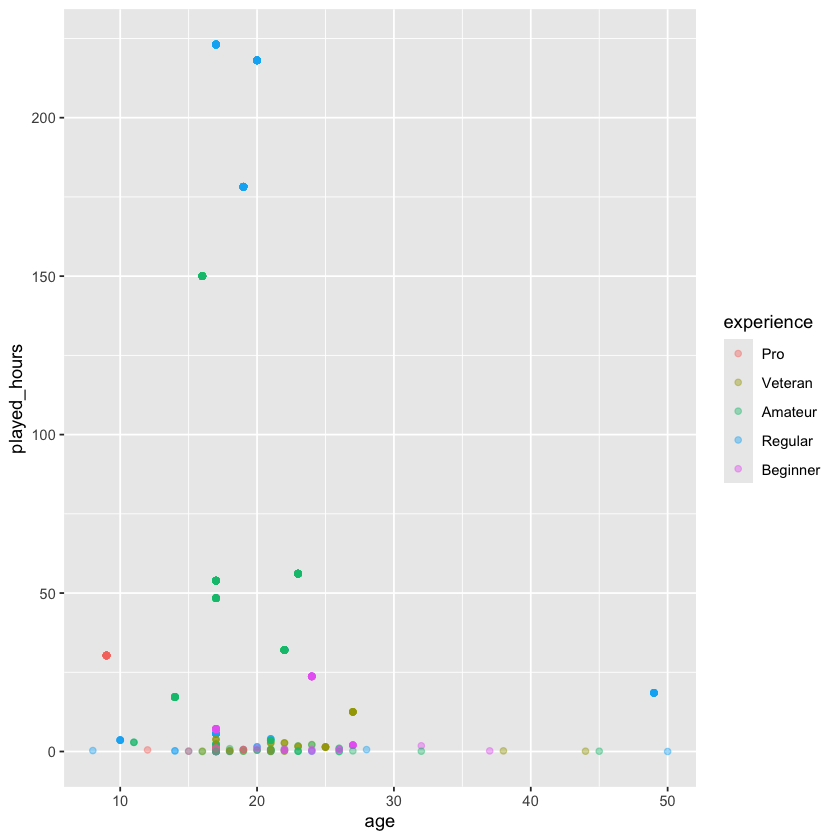

In [23]:
# Exploring the relationship between age and hours played

age_plot <- merged_data |>
    # select(age, hours_played) |>
    ggplot(aes(x=age, y=played_hours, colour=experience)) +
        geom_point(alpha=0.4)
age_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


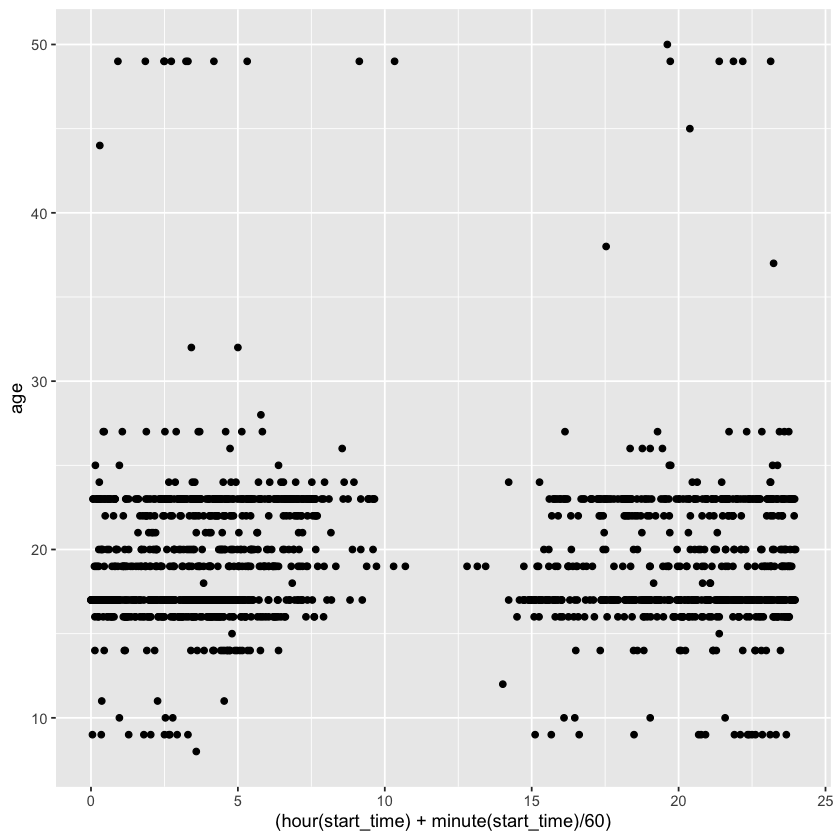

In [24]:
# Exploring session start times relative to player age
time_plot <- merged_data |>
    ggplot(aes(x=(hour(start_time) + minute(start_time)/60), y=age) )+
        geom_point()

time_plot

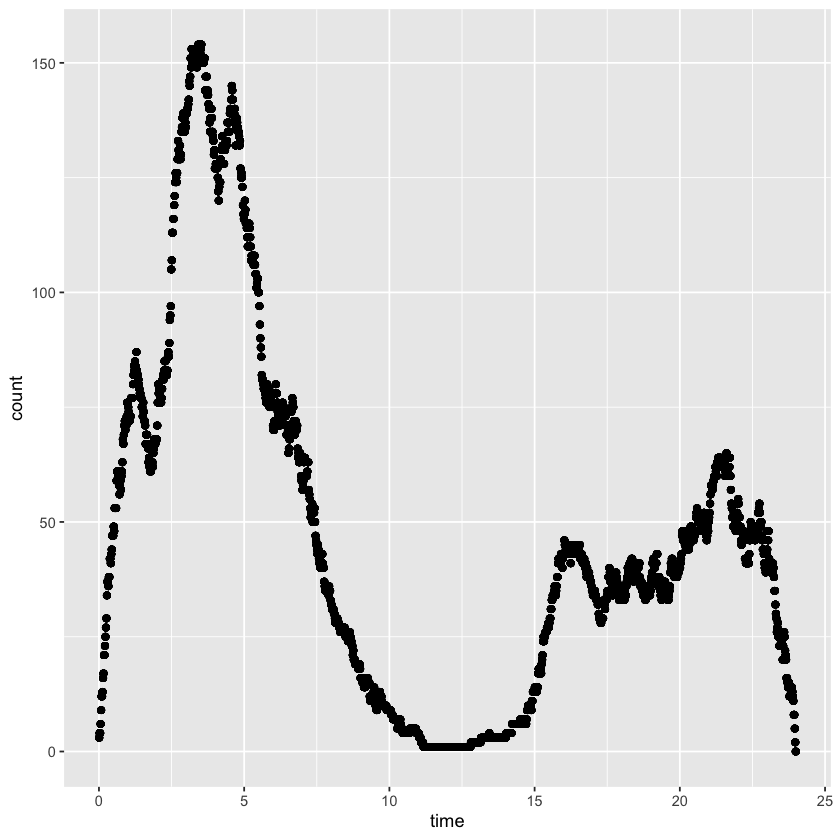

In [ ]:
# Exploring the total users active on the server over a 24 hour period. Idea: Seperate over unique days?

# time_data <- merged_data |>
#     select(start_time, end_time) |>
#     mutate(start_time = hour(start_time) + minute(start_time)/60, end_time = hour(end_time) + minute(end_time)/60) |>
#     na.omit()

# # time_data
# time_seq <- seq(from = 0, to = 24, by = 1/(60*24))

# activity_by_min <- tibble(time = time_seq) |>
#     rowwise() |>
#     mutate(count = sum(time_data$start_time <= time & time_data$end_time > time))

# # activity_by_min

# activity_plot <- activity_by_min |> ggplot(aes(x=time, y=count)) +
#     geom_point()

# activity_plot

### Discussion 💬
<!-- summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to? -->

### References 📚
<!-- You may include references if necessary, as long as they all have a consistent citation style. -->
Reference will be compiled and added at a later date. Issues placed on GitHub.